In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import time

In [2]:
train_df = pd.read_csv('train_small.csv', header=None)
test_df = pd.read_csv('test_small.csv')

In [17]:
idx = features = train_df.columns.values[2:202]
train_df['sum'] = train_df[idx].sum(axis=1)  
train_df['min'] = train_df[idx].min(axis=1)
train_df['max'] = train_df[idx].max(axis=1)
train_df['mean'] = train_df[idx].mean(axis=1)
train_df['std'] = train_df[idx].std(axis=1)
train_df['skew'] = train_df[idx].skew(axis=1)
train_df['kurt'] = train_df[idx].kurtosis(axis=1)
train_df['med'] = train_df[idx].median(axis=1)

In [25]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,sum,min,max,mean,std,skew,kurt,med
0,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,18.3560,1.9518,1415.3636,-47.3797,40.5632,7.076818,10.336130,-0.351734,4.110215,7.22315
1,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,14.7222,0.3965,1240.8966,-22.4038,33.8820,6.204483,8.753387,-0.056957,0.546438,5.89940
2,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,17.9974,-8.8104,1354.2310,-65.4863,41.1037,6.771155,11.287122,-1.463426,9.787399,6.94735
3,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,12.5809,-4.7602,1272.3216,-44.7257,35.2664,6.361608,9.313012,-0.920439,4.581343,6.23790
4,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,10.8869,-3.2097,1509.4490,-29.9763,39.9599,7.547245,9.246130,-0.133489,1.816453,7.47605


In [32]:
train_targets = train_df.iloc[:30000,1]
train_data = train_df.iloc[:30000,2:]
test_targets = train_df.iloc[30000:,1]
test_data = train_df.iloc[30000:,2:]

In [33]:
dtrain = xgb.DMatrix(train_data, label=train_targets)
dtest = xgb.DMatrix(test_data, label=test_targets)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [40]:
# specify parameters via map

start = time.time()

param = {'max_depth':1, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
num_round = 3000
model = xgb.train(param, dtrain, num_round)

end = time.time()
print(end - start)

179.87491846084595


10000 samples took 34.10578370094299 seconds, AUC: 82.2191% 


5000  samples took 13.62356400489807 seconds, AUC: 79.6346% 
    depth 3 : 12 seconds less precise
    depth 1 : 10.697545051574707 s  81.3239% 


30000 samples with depth of 4 took 178.4267921447754 seconds and yielded AUC: 83.2552%

30000 samples with depth of 1 took 60.08928918838501 seconds and yielded AUC: 86.3396% 

In [41]:
# make prediction
preds = model.predict(dtest)

In [42]:

roc = roc_auc_score(test_targets, preds)
print("AUC: %.4f%% " % (roc * 100))

AUC: 85.7361% 


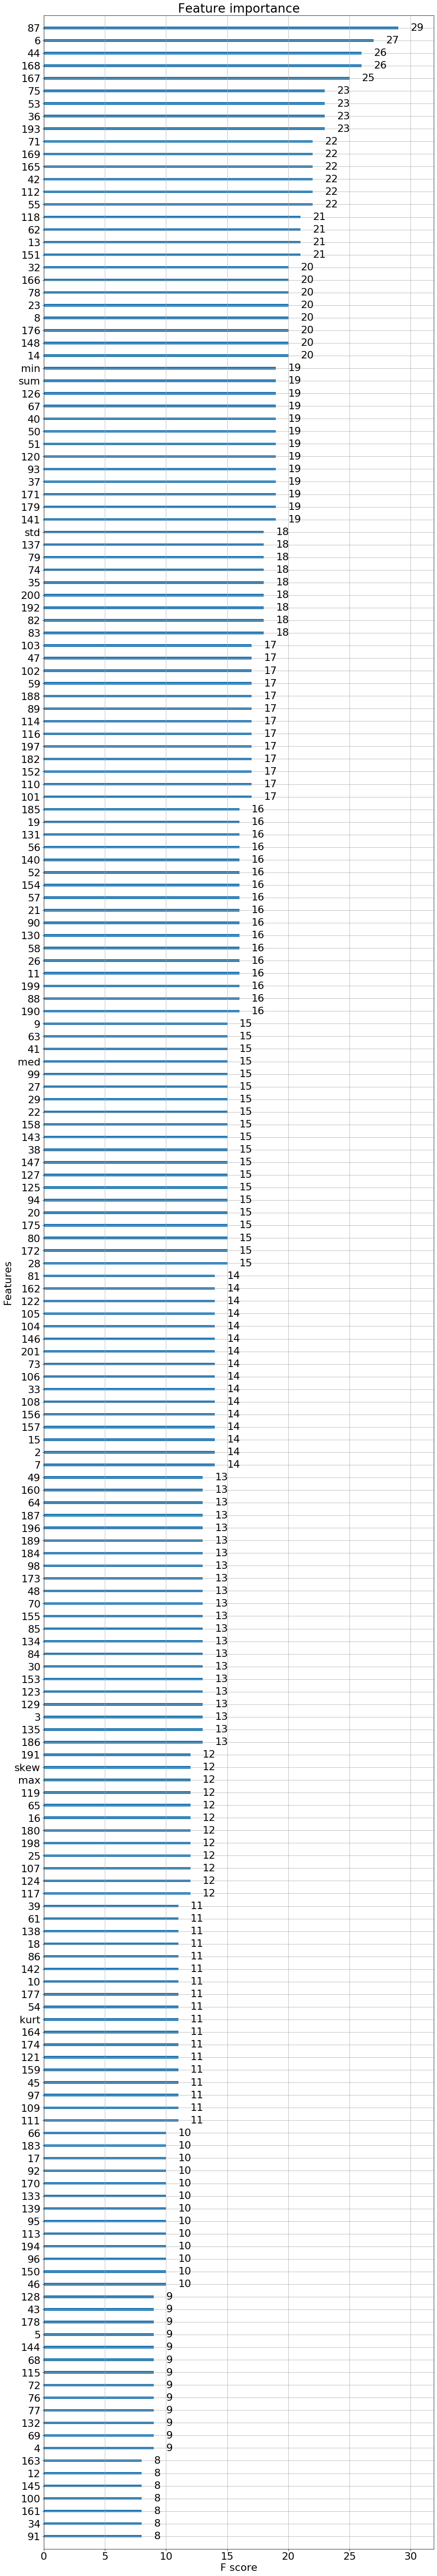

In [43]:
%matplotlib inline
from matplotlib import pyplot
from matplotlib.pylab import rcParams
rcParams.update({'font.size': 22})
rcParams['figure.figsize'] = 15,100

xgb.plot_importance(model,max_num_features=200)
pyplot.show()

ValueError: Unable to parse node: 0:[83

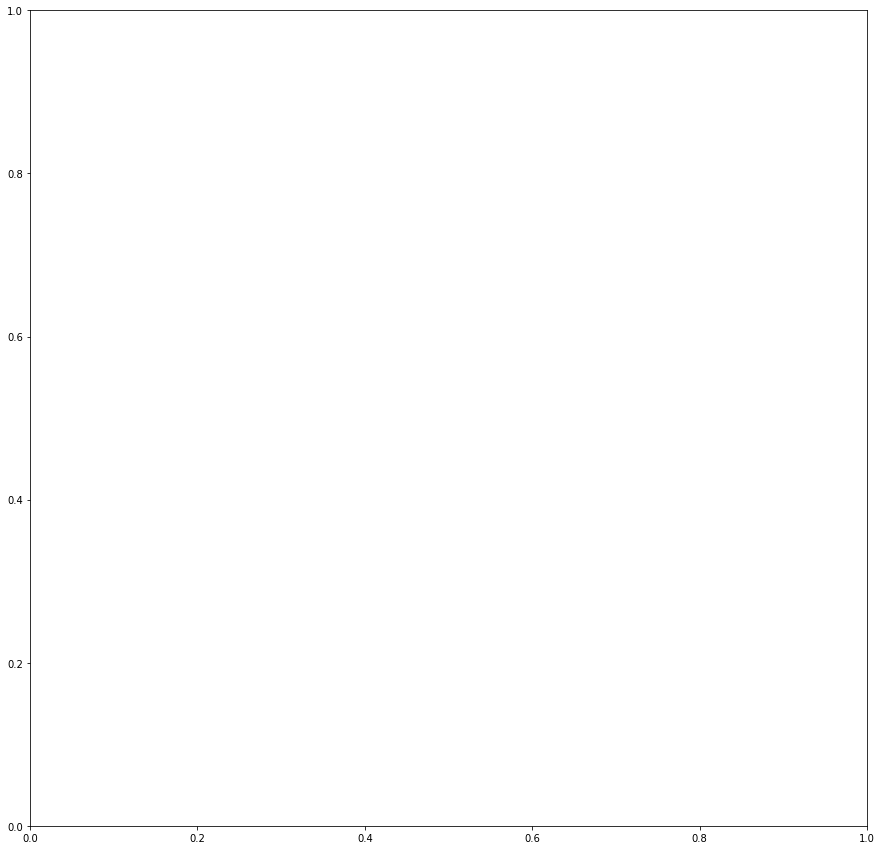

In [9]:
rcParams['figure.figsize'] = 15,15
xgb.plot_tree(model)
pyplot.show()